<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Diagramas de Pastel y Gráficos de Caja, Dispersión y Burbuja</font></h1>


## Introducción

En este laboratorio continuaremos explorando la librería Matplotlib. Especificamente aprenderemos a crear gráficas de pastel, de caja, de dispersión y diagramas de burbuja.


## Tabla de Contenido

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Explorando conjuntos de datos con *pandas*](#0)<br>
2.  [Descarga y preparación de datos](#2)<br>
3.  [Visualizar Datos con Matplotlib](#4) <br>
4.  [Diagramas de Pastel](#6) <br>
5.  [Gráficas de Caja](#8) <br>
6.  [Gráficas de Dispersión](#10) <br>
7.  [Gráficas de Burbuja](#12) <br>

</div>
<hr>


# Exploración de Conjuntos de Datos con *pandas* y Matplotlib<a id="0"></a>

Herramientas: Este curso hace un uso reiterado de [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) y [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) para discutir, analizar y visualizar los datos. La principal librería grafica que exploraremos en este curso es [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01).

Conjunto de Datos: Inmigración en Canadá desde 1980 a 2013 – [Flujos migratorios internacionales a y desde los países seleccionados – Revisión de 2015 ](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) del portal de la ONU.

El conjunto de datos contiene información anual sobre los flujos de migración internacional recopilada por los países de destino. Los datos representan flujos de entrada y salida de acuerdo con el lugar de nacimiento, ciudadanía o lugar de residencia anterior/próxima tanto para extranjeros como nacionales. En esta sesión, nos enfocaremos en los datos Migratorios de Canadá.


# Descarga y preparación de los datos<a id="2"></a>


Importar los Módulos Primarios:


In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios

Vamos a descargar e importar el conjunto principal de datos sobre Inmigración en Canadá utilizando el método *pandas* `read_excel()`. Normalmente, antes de hacerlo, necesitaremos descargar un modulo requerido por *pandas* para poder leer archivos de Excel. Este modulo es **xlrd**. Para tu comodidad, hemos preinstalado dicho modulo. De no ser así, tendrías que ejecutar la siguiente línea de código para instalar el modulo **xlrd**:

```
!conda install -c anaconda xlrd --yes
```


Descargar el conjunto de datos y asignarlo a un *pandas* DataFrame


In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Veamos los primeros cinco elementos de nuestro conjunto de datos


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Vamos a encontrar cuantas entradas de datos hay en el conjunto


In [4]:
# imprimir el tamaño del DataFrame
print(df_can.shape)

(195, 43)


Limpiar datos. Haremos algunas modificaciones al conjunto original para facilitar la visualización de estos. Revisar el laboratorio *Introducción a Matplotlib y a las Graficas de Líneas* y *Diagramas de Area, Barras e Histogramas* para una descripción racional y detalladas de los cambios.


In [5]:
# depurar el conjunto de datos para borrar columnas innecesarias (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Cambiar el nombre de algunas columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para tener consistencia, asegúrate de que todas las columnas sean del tipo cadena
df_can.columns = list(map(str, df_can.columns))

# Establece el nombre del país (country) como índice – muy útil para hacer búsquedas por países utilizando el método .loc
df_can.set_index('Country', inplace=True)

# Agrega un columna para el total
df_can['Total'] = df_can.sum(axis=1)

# años que usaremos en esta lección – de utilidad para graficar mas adelante
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


/tmp/ipykernel_14585/287086322.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualizar los Datos mediante Matplotlib<a id="4"></a>


Importar `matplotlib`.


In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para estilo tipo ggplot

# revisar la última versión de Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


# Diagramas de Pastel <a id="6"></a>

Un `Diagramas de Pastel` es un gráfico circular que muestra proporciones numéricas al dividir un circulo (o pastel) en pedazos proporcionales. Seguramente te resulten familiares estos diagramas ya que son extensamente usados en los negocios y medios de comunicación. Podemos crear diagramas de pastel en Matplotlib usando la palabra clave `kind=pie`.

Usemos uno de estos diagramas para explorar la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes para el periodo de 1980 a 2013.


Paso 1: Recolección de Datos.

Usaremos el método de *pandas* `groupby` para resumir los datos de inmigración por `Continente`. El proceso general de `groupby` consta de los siguientes pasos:

1.  **Split** Dividir los datos en grupos en base a algún criterio.
2.  **Apply** Aplicar independientemente una función a cada grupo:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Juntar los resultados en una estructura de datos.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [7]:
# agrupar los países por continente y aplicar la función sum()  
df_continents = df_can.groupby('Continent', axis=0).sum()

# observación: la salida del método groupby es un objeto `groupby' 
# no podemos usarla hasta que se aplique una función (p. ej. .sum()) 
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Paso 2: Gráficar los datos. Usaremos `kind = 'pie'` junto con el resto de los parametros:

*   `autopct` - es una cadena o función usada para etiquetar las partes de la gráfica con su valor numérico. La etiqueta sera puesta dentro de cada porcion. Si es una cadena con formato, la etiqueta será `fmt%pct`.
*   `startangle` - rota el inicio del pastel en grados en sentido horario opuesto desde el eje x.
*   `shadow` - Dibuja una sombra bajo el pastel (para darle un aspecto 3D).


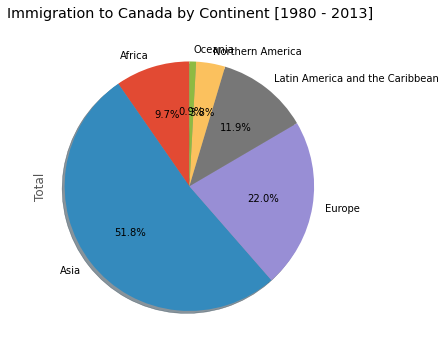

In [8]:
# autopct crea %, el angulo de inicio representa el punto de inicio 
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añade en porcentajes 
                            startangle=90,     # angulo de inicio 90° (Africa)
                            shadow=True,       # añade sombreado   
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # el pastel tiene aspecto circular 

plt.show()

La visualización de arriba no esta muy clara, los números y el texto se sobreponen en algunas partes. Hagamos algunas modificaciones para mejorarla.

*   Quitar las etiquetas de texto en la gráfica pasandole `legend` y añadiendolo separadamente utilizando `plt.legend()`.
*   Retira los porcentajes para ponerlos afuera de la gráfica pasando el parametro `pctdistance`.
*   Pasa un conjunto personal de colores a los continentes con el parametro `colors`.
*   **Explota** la gráfica para enfatizar a los ultimos tres continente (Africa, Norte America, Latino America y el Caribe) pasando el parametro `explode`.


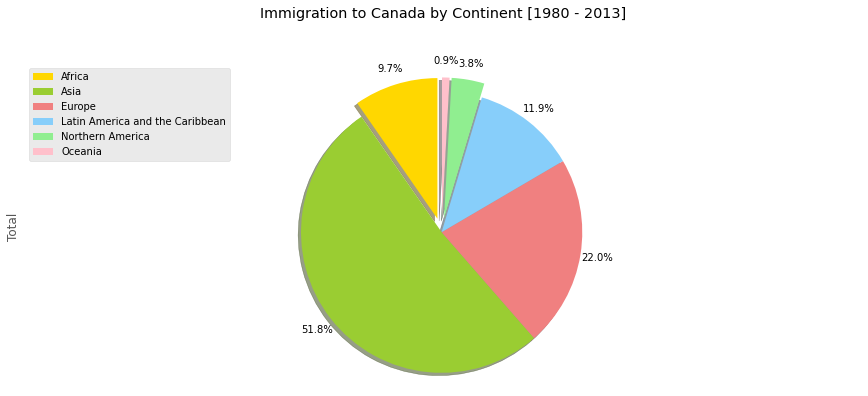

In [9]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # la relacion para cada continente para compensar cada parte del pastel.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # deshabilita las etiquetas de la gráfica 
                            pctdistance=1.12,    # la relación entre el centro de cada trozo del pastel y el inicio del texto generado por autopct 
                            colors=colors_list,  # añadir colores personalizados 
                            explode=explode_list # 'explota' los últimos tres continentes
                            )

# escala el título un 12% para igualar pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# añade etiqueta
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Pregunta:** Usando una gráfica de pastel, explora la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes en el año 2013.

**Observación:** Quizas necesites investigar con los valores de exploración para solventar los valores solapados de las partes del pastel


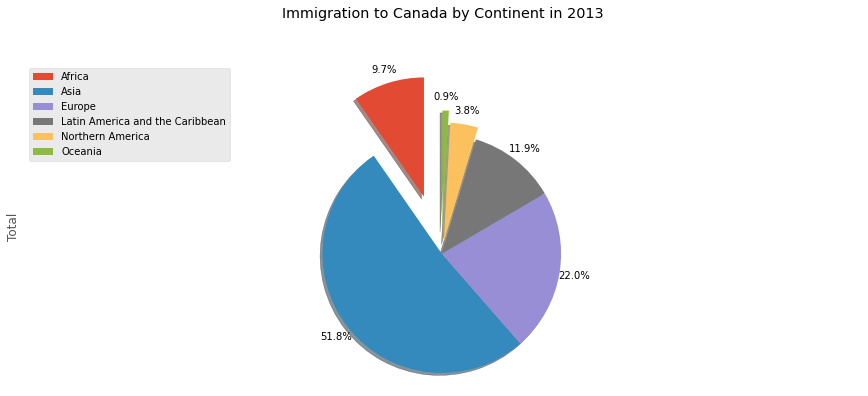

In [23]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
-->

<!--
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
-->

<!--
\\\\ # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 
-->

<!--
\\\\ # add legend
plt.legend(labels=df_continents.index, loc='upper left') 
-->

<!--
\\\\ # show plot
plt.show()
-->


# Gráficas de Caja <a id="8"></a>

Una `gráfica de caja` es una forma de representar estadisticamente la *distribución* de los datos mediante cinco dimensiones principales:

*   **Minimo:** El número mas pequeño del conjunto de datos
*   **Primer Cuartil:** El número del medio entre el `minimo` y la `mediana`
*   **Segundo Cuartil (Mediana):** El número en la mitad del conjunto de datos
*   **Tercer Cuartil:** El número del medio entre la `mediana` y el `máximo`
*   **Máximo:** El número mas grande del conjunto


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">


Para construir una `gráfica de caja` podemos utilizar `kind=box` en el método `plot` invocado en una serie de dataframe *pandas*.

Dibujemos la gráfica para los inmigrantes japoneses entre 1980 y 2013.


Paso 1: Obtener el conjunto de datos. A pesar de extraer datos para un solo país, lo haremos como un dataframe. Esto nos ayudará a llamar el método `dataframe.describe()` para ver los percentiles.


In [11]:
# para obtener el dataframe se colocan corchetes alrededor de Japan (Japón)
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Paso 2: Dibujar la gráfica con `kind='box'`.


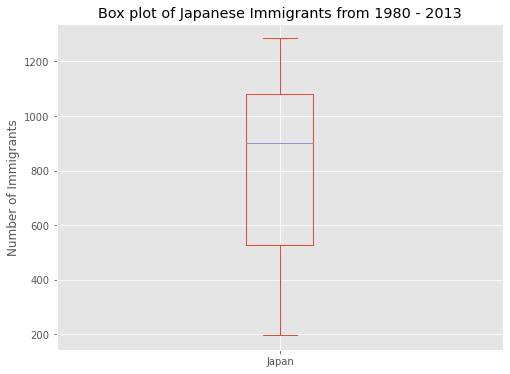

In [12]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Inmediatamente podemos hacer un par de observaciones de la gráfica anterior:

1.  El número mínimo de inmigrantes es de alrededor de 200 (min), el máximo de 1300 (max) y una mediana de 900 (median).
2.  25% de los años para el periodo 1980 - 2013 tienen una cuenta anual de inmigrantes de \~500 o menos (primer cuartil).
3.  75% de los años para el periodo 1980 - 2013 tienen una cuenta anual de inmigrantes de \~1100 o menos (tercer cuartil).

Podemos ver el número actual haciendo una llamada al método `describe()` en el dataframe.


In [13]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Uno de los mejores beneficios de las gráficas de caja es poder comparar la distribución de dos conjuntos de datos. En uno de los laboratorios previos observamos que China e India comparten tendencias semejantes en inmigración. Analicemos mejor estos dos países usando gráficas de caja.

**Pregunta:** Compare la distribución del numero de nuevos inmigrantes de India y China para el periodo 1980 - 2013.


Paso 1: Obtener el conjunto de datos para China e India y llamar al dataframe **df_CI**.


In [14]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()
-->


Veamos los porcentajes asociados en ambos países usando el método `describe()`.


In [15]:
### Escribe aquí tu respuesta



Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
df_CI.describe()
-->


Paso 2: Dibujar la gráfica.


In [16]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
df_CI.plot(kind='box', figsize=(10, 7))
-->

<!--
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
-->

<!--
plt.show()
-->


Podemos observar que mientras ambos países tiene una mediana parecida en la población inmigrante (\~20,000), la de China tiene un rango mas amplio que India. La población máxima para India para cualquier año (36,210) es alrededor de 15% menos que el máxima poblacion de China (42,584).


Si prefieres las gráficas de caja horizontales, puedes hacerlo pasando el parámetro `vert` en la función **plot** y asignarle un valor *False*. Además puedes especificar un color diferente en caso de no querer el color rojo que tiene por defecto.


In [17]:
# gráficas de caja horizontales
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

NameError: name 'df_CI' is not defined

**Sub gráficas**

A veces queremos dibujar multiples gráficas en la misma imagen. Por ejemplo pudieras querer una comparación lado a lado de una gráfica de caja junto a otra de línea sobre la inmigración de China e India.

Para visualizar juntas multiples gráficas podemos crear un **`figure`** y dividirlo en **`subplots`**, conteniendo una gráfica cada una. Con **sub gráficas** normalmente trabajamos con la **capa de artista** en lugar de la **capa de scripting**.

La sintaxis tipica es : <br>

```python
    fig = plt.figure() # crear imagen
    ax = fig.add_subplot(nrows, ncols, plot_number) # crear sub gráfica
```

Donde

*   `nrows` y `ncols` son usados para separar la figura en sub ejes (`nrows` \* `ncols`),
*   `plot_number` es usado para identificar la sub gráfica particular que esta función creara dentro de la malla. `plot_number` empieza en 1, se incrementa primero por las filas y tiene un máximo de `nrows` \* `ncols` como se muestra a continuación.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">


Podemos especificar cual sub gráfica colocar en cada gráfica pasando el parametro `ax` al método `plot()` de la siguiente manera:


In [ ]:
fig = plt.figure() # crear imagen

ax0 = fig.add_subplot(1, 2, 1) # añadir sub gráfica 1 (1 fila, 2 columnas, primer gráfica)
ax1 = fig.add_subplot(1, 2, 2) # añadir sub gráfica 2 (1 fila, 2 columnas, segunda gráfica). Mirar tip mas abajo**

# Sub gráfica 1: Gráfica de Caja
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # añadir sub gráfica 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Sub gráfica 2: Gráfica de Línea
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # añadir sub gráfica 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

\*\* \* Consejo acerca de la convención de las sub gráficas \*\*

En el caso donde `nrows`, `ncols` y `plot_number` son menores a 10, existe una conveniencia tal que un número de 3 cifras es dando en su lugar, donde los cientos representan `nrows`, las decenas `ncols` y las unidades `plot_number`. Por ejemplo:

```python
   subplot(211) == subplot(2, 1, 1) 
```

produce un sub eje en una imagen la cual representa la gráfica de arriba en 2 filas y una columna.


Intentemos algo mas avanzado.

Previamente identificamos los 15 principales paises en base a su inmigración total desde 1980 a 2013.

**Pregunta:** Crea una gráfica de caja para visualizar la distribución de los 15 países principales (en base al total de inmigración) agrupados por las *décadas* `1980`, `1990` y `2000`.


Paso 1: Obtener el conjunto de datos. Obtener los 15 primeros países en base al total de la poblacion inmigrante. Nombra al dataframe **df_top15**.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15
-->


Paso 2: Crea un nuevo dataframe el cual contenga el agregado de cada década. Una forma de hacerlo es:

1.  Crear una lista de todos los años separados por las decadas 80, 90 y 2000.
2.  Divide el dataframe original df_can para crear una serie para cada década y hacer la suma de todos los años para cada país.
3.  Juntar las tres series en un nuevo dataframe. Llama a este dataframe **new_df**.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\\\ # create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
-->

<!--
\\\\ # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
-->

<!--
\\\\ # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
-->

<!--
\\\\ # display dataframe
new_df.head()
-->


Aprendamos mas acerca de las estadísticas asociadas al dataframe usando el método `describe()`.


In [ ]:
### Escribe aquí tu respuesta



Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
new_df.describe()
-->


Paso 3: Dibuja las gráficas de caja.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
new_df.plot(kind='box', figsize=(10, 6))
-->

<!--
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
-->

<!--
plt.show()
-->


Observa como la gráfica de caja es distinta de la tabla resumida que se creó. La gráfica escanea los datos e identifica los que estan separados (outliers). Para reconocer un dato separado, su valor debe ser:<br>

*   mayor a Q3 por al menos 1.5 veces el rango intercuartil (IQR), o,
*   mas pequeño que Q1 por la menos 1.5 veces IQR.

Revisemos la decada del 2000 como ejemplo: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Usando esto para definir datos atípicos (outliers), cualquier valor mayor a Q3 por 1.5 veces IQR tendra esta caracteristica.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


In [ ]:
# comprobemos cuantas entradas caen en la definición de dato separado
new_df[new_df['2000s']> 209611.5]

China e India se consideran atípicos debido a que su población para la década excede 209,611.5.

La gráfica de caja es una herramienta de visualización avanzada y existen muchas opciones y ajustes que sobrepasan el alcance de este laboratorio. Por favor revise la [Documentación de Matplotlib](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01#matplotlib.pyplot.boxplot) para mayor información.


# Gráfica de Dispersión <a id="10"></a>

Una `gráfica de dispersión` (2D) es un método util para comparar variables entre si. Una gráfica de `dispersión` es similar a una de `línea` en que ambas muestran variables dependientes e independientes en una gráfica 2D. A pesar de los puntos de datos estan conectados entre si por una línea en una gráfica de línea, no lo estan en una de dispersión. Los datos en las de dispersión muestran tendencias. Con analisis mas profundos usando herramientas como la regresión, podemos matematicamente calcular esta relacion y usarla para predecir tendencias fuera del conjunto de datos.

Empecemos explorando lo siguiente:

Usando una `gráfica de dispersión`, visualicemos la tendencia del total de inmigración hacia Canadá (todos los países combinados) para los años 1980 - 2013.


Paso 1: Obtener el conjunto de datos. Debido a que esperamos usar la relación entre `años` y `población total`, convertiremos `años` a tipo `int`.


In [ ]:
# podemos usar el método sum() para obtner la población total anual
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# cmabiar los años a tipo entero (será util para hacer regresión mas adelante)
df_tot.index = map(int, df_tot.index)

# establecer de nuevo el índice para regresarlas a columnas en el dataframe df_tot
df_tot.reset_index(inplace = True)

# renombrar las columnas 
df_tot.columns = ['year', 'total']

# ver el dataframe final 
df_tot.head()

Paso 2: Dibujar los datos. En `Matplotlib` podemos crear gráficos de dispersión pasando `kind='scatter'` como argumento. También necesitaremos pasar `x` y `y` para especificar las columnas que iran en los ejes x e y.


In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Observa como la gráfica de dispersión no conecta los datos entre si. Podemos obervar con facilidad un tendencia positiva en los datos: a medida que pasan los años, el número total de inmigrantes asciende. Podemos analizar matematicamente esta tendencia positiva usando una línea de regresión.


Tratemos de gráficar una línea de regresión y utilizarla para predecir el numero de inmigrantes en 2015.

Paso 1: Obtener la ecuación de la línea. Usaremos el método `polyfit()` de **Numpy** pasando lo siguiente:

*   `x`: coordenadas x de los datos
*   `y`: coordenadas y de los datos
*   `deg`: Grados polinomiales. 1 = lineal, 2 = cuadrática, etc ..


In [ ]:
x = df_tot['year']      # año en el eje x 
y = df_tot['total']     # total en el eje y
fit = np.polyfit(x, y, deg=1)

fit

La salida es un arreglo con los coeficientes polinomiales, las potencias mas grandes primero. Debido a que estamos graficando una regresión lineal `y= a*x + b`, la salida tiene 2 elementos `[5.56709228e+03, -1.09261952e+07]` con la pendiente en 0 y la intercepción en 1.

Paso 2: Gráficar la regresión lineal en la `gráfica de dispersión`.


In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# dibujar línea de regresión
plt.plot(x, fit[0] * x + fit[1], color='red') # recuerda que x son los Años 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# imprimir la línea optima
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Usando la ecuación de la línea óptima podemos estimar el número de inmigrantes para 2015:

```python
No. Immigrantes = 5567 * Año - 10926195
No. Immigrantes = 5567 * 2015 - 10926195
No. Immigrantes = 291,310
```

Cuando lo comparamos con los números actuales del [Reporte Anual 2016](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01), de Ciudadanía e Inmigración de Canadá (CIC) podemos ver que Canadá ha aceptado 271,845 inmigrantes en 2015. Nuestro valor estimado de 291,310 esta dentro del 7% del número actual, lo cual es bastante bueno si se considera que nuestros datos originales vienen de Naciones Unidas (y pudieran ser un poco distintas de los datos del CIC).

Como observación adicional, podemos observar que la inmigración alrededor de 1993 - 1997 tuvo una caida. Un análisis mas profundo sobre el tema reveló que en 1993 Canadá introdujo la Ley C-86 que añadió revisiones al sistema para determinar quien o no es refugiado, muchas de ellas restrictivas. Enmiendas adicionales a las Regulaciones Migratorias suprimierón el patrocinio requerido para la "ayuda a parientes" haciendo mas dificil para los miembros de la familia (fuera del nucleo familiar) migrar a Canadá. Estas medidas restrictivas tuvieron un impacto directo en los número inmigratorios en los siguientes siete años.


**Pregunta:** Crear una gráfica de dispersión del número total de inmigrantes provenientes de Dinamarca, Noruega y Suecia desde 1980 a 2013.


Paso 1: Obtener los datos:

1.  Crear un dataframe que consista en los número asociados con Dinamarca, Noruega y Suecia unicamente. Nómbralo **df_countries**.
2.  Suma los número de inmigración de los tres países para cada año y convierte el resultado en un dataframe. Nombra este dataframe como **df_total**.
3.  Reestablece el índice.
4.  Renombra las columnas como **year** y **total**.
5.  Muestra el dataframe resultante.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\\\ # create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
-->

<!--
\\\\ # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
-->

<!--
\\\\ # reset index in place
df_total.reset_index(inplace=True)
-->

<!--
\\\\ # rename columns
df_total.columns = ['year', 'total']
-->

<!--
\\\\ # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
-->

<!--
\\\\ # show resulting dataframe
df_total.head()
-->


Paso 2: Genera la gráfica de dispersión mostrando el total contra el año en **df_total**.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\\\ # generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
-->

<!--
\\\\ # add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
-->

<!--
\\\\ # show plot
plt.show()
-->


# Gráficas de Burbuja <a id="12"></a>

Una `gráfica de burbuja` es una variante de la `gráfica de dispersión` que muestra los datos en tres dimensiones (x, y, z). Los datos son reemplazados por burbujas y el tamaño de cada una es determinado por la variable 'z', conocida tambien como el peso. En `Matplotlib` podemos pasar un arreglo o escalar mediante `s` a la función `plot()`, que contiene el peso de cada punto.

**Empecemos analizando el efecto de la gran depresión en Argentina**.

Argentina padeció una severa depresión entre 1998 y 2002 que causó un desempleo generalizado, disturbios, la caida del gobierno y la suspensión de pagos de su deuda externa. En término de ingresos, mas del 50% de los argentinos empobrecierón y siete de cada diez niños eran pobres en los mas profundo de la crisis en 2002.

Analicemos el efecto de la crisis y vamos a comparar la inmigración de argentinos hacia su país vecino Brasil. Vamos a usar una `gráfica de burbuja` para los años 1980 a 2013. Estableceremos los pesos para las burbujas como el valor *normalizado* para cada año.


Paso 1: Obtener los datos de Brasil y Argentina. Al igual que ejemplo anterior, convertiremos `Years` a tipo entero (int) y lo colocaremos en el dataframe.


In [ ]:
df_can_t = df_can[years].transpose() # transponer dataframe

# cambia el tipo de Years (el índice) a entero
df_can_t.index = map(int, df_can_t.index)

# etiquetar el índice. Automaticamente será el nombre de la columna cuando se haga reset al índice
df_can_t.index.name = 'Year'

# reset al índice para colocar Year como columna
df_can_t.reset_index(inplace=True)

# ver los cambios
df_can_t.head()

Paso 2: Crear los pesos normalizados.

Existen diversos métodos de normalización en estadística, cada uno con su propia función. En este caso, usaremos el [escalado de variables](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) para colocar todos lo valores en el rango \[0,1]. La formula general es:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

donde *`X`* es el valor original, *`X`* es el valor normalizado. La fórmula establece el valor máximo en el conjunto de datos a 1, y el mínimo a 0. El resto de datos se escalan acordemente a valores entre 0-1.


In [ ]:
# normalizar los de datos de Brasil
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalizar los de datos de Argentina
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Paso 3: Graficar los datos.

*   Para graficar dos distintas gráficas de dispersión, podemos incluir los ejes de una dentro de otra mediante el parametro `ax`.
*   Pasaremos además los pesos con el paremtro `s`. Dado que los pesos normalizados se encuentran entre 0 y 1, estos no seran visibles en la gráfica. Por lo tanto:
    *   multiplicaremos los pesos por 2000 para escalarlos en la gráfica, y
    *   sumaremos 10 para compensar el valor mínimo (que tiene un peso de 0).


In [ ]:
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparencia
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pasar los pesos
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

El tamaño de las burbujas corresponde a la magnitud de la población inmigrante para ese año, comparado con los datos de 1980 - 2013. Cuanto mas grande es la burbuja mas inmigrantes corresponden a ese año.

En la gráfica de arriba podemos ver un incremento de la inmigración desde Argentina durante los años de la depresión de 1998 a 2002. También observamos un repunte similar entre 1985 y 1993. De hecho, Argentina sufrió una depresión de 1974 a 1990, justo antes de la de 1998 a 2002.

En una observación similar, Brasil sufrió el *Efecto Samba* en el cual su moneda el Real se devaluó cerca del 35% en 1999. Hubo temor sobre una crisis financiera sudamericana debido a que aquellos paises tenian una fuerte dependencia de las exportaciones industriales desde Brasil. El gobierno brasileño adoptó un programa de austeridad y su economía poco a poco se recuperó cada año, finalizando con un descenso en 2010. Los datos de inmigración reflejan estos eventos.


**Pregunta:** Previamente en este laboratorio creamos gráficas de caja para comparar la inmigración desde China e India hacia Canadá. Crea gráficas de burbuja de la inmigración desde China e India para visualizar cualquier diferencia entre 1980 a 2013. Puedes usar **df_can_t** que hemos definido y utilizarlo en el ejemplo previo.


Paso 1: Normalizar los datos de China e India.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\\\ # normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
-->

<!--
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
-->


Paso 2: Generar los gráficas de burbuja.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\\\ # China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
-->

<!--
\\\\ # India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
-->

<!--
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
-->


### ¡Gracias por completar este laboratorio!

Este cuaderno fue creado originalmente por [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) con aportes de [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01) y [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01).

Recientemente, esta libreta fue modificada por [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01). Espero que esta sesión de laboratorio le haya resultado interesante. ¡Si tiene alguna pregunta, comuníquese conmigo!


<hr>

Copyright © 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0101ESCoursera33498784-2021-01-01).
